<a href="https://colab.research.google.com/github/ParthDave111/Quant-and-Finance-File/blob/main/Black_Sholes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MARKOV'S PROPERTY AND GBM¶

In [ ]:
import numpy as np

X = np.random.randn(100)
X

array([-0.09035747,  0.17926185,  0.5567438 ,  1.08404762, -0.53886016,
       -1.3385138 ,  0.08848483, -1.33703173, -1.59598475,  0.04267209,
        1.67270601, -0.28049642, -1.20106662,  0.26664717,  0.15422428,
       -0.17765577, -0.45609952,  1.21516011, -0.29490483,  0.56321614,
        0.15732017, -1.30083998,  0.46506279,  0.88793227,  0.28392021,
       -0.50524521,  1.09433953, -0.706116  , -0.14541701,  0.18423898,
       -0.80444715,  1.07651813, -1.42323656, -1.41554871, -0.19166098,
       -0.79542507, -0.34738736, -0.86127146,  2.03207713,  0.40010371,
        1.08551711, -0.65539145,  0.59318584, -0.98025496,  1.37132558,
       -0.51079853, -0.62566867,  0.2329313 , -1.02954586,  0.75020937,
        0.96621141, -0.1617341 , -1.02535111,  0.53861609,  0.84370033,
       -0.45826379,  0.19067808, -0.63912136, -0.16388958, -0.98228931,
       -0.41742958,  1.6117301 ,  0.50821975, -0.60785471, -1.18892097,
        1.6406101 , -2.06413336,  0.00607309, -0.44106573,  0.89

In [ ]:
np.random.seed(10)
X = np.random.randn(100)
X

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021,
        0.43302619,  1.20303737, -0.96506567,  1.02827408,  0.22863013,
        0.44513761, -1.13660221,  0.13513688,  1.484537  , -1.07980489,
       -1.97772828, -1.7433723 ,  0.26607016,  2.38496733,  1.12369125,
        1.67262221,  0.09914922,  1.39799638, -0.27124799,  0.61320418,
       -0.26731719, -0.54930901,  0.1327083 , -0.47614201,  1.30847308,
        0.19501328,  0.40020999, -0.33763234,  1.25647226, -0.7319695 ,
        0.66023155, -0.35087189, -0.93943336, -0.48933722, -0.80459114,
       -0.21269764, -0.33914025,  0.31216994,  0.56515267, -0.14742026,
       -0.02590534,  0.2890942 , -0.53987907,  0.70816002,  0.84222474,
        0.2035808 ,  2.39470366,  0.91745894, -0.11227247, -0.36218045,
       -0.23218226, -0.5017289 ,  1.12878515, -0.69781003, -0.08112218,
       -0.52929608,  1.04618286, -1.41855603, -0.36249918, -0.12

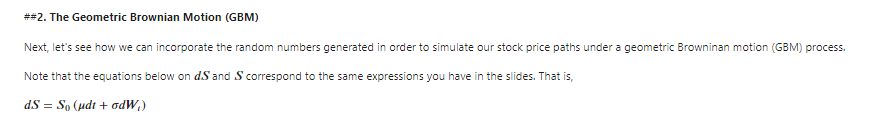

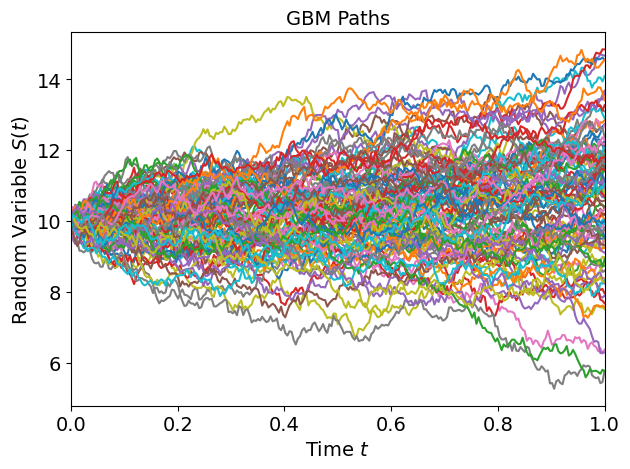

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

T = 1  # years
N = 255  # Number of points, number of subintervals = N-1
dt = T / N  # Time step in "years"
t = np.linspace(0, T, N)
M = 100  # Number of paths (Monte Carlo approach)
vol = 0.18
S0 = 10
mu = 0.08  # drift

dS = S0 * (mu * dt + vol * np.sqrt(dt) * np.random.randn(M, N))
S = S0 + np.cumsum(dS, axis=1)


for i in range(M):
    plt.plot(t, S[i, :])

plt.xlabel("Time $t$", fontsize=14)
plt.ylabel("Random Variable $S(t)$", fontsize=14)
plt.title("GBM Paths", fontsize=14)
axes = plt.gca()
axes.set_xlim([0, T])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

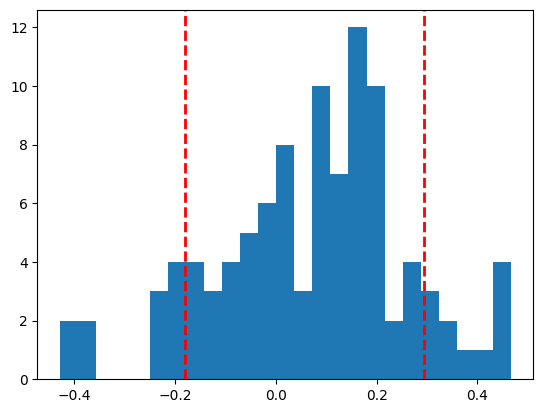

In [ ]:
Returns = (S[:, -1] - S[:, 0]) / S[:, 0]
plt.hist(Returns, bins=25)

plt.axvline(np.percentile(Returns, 10), color="r", linestyle="dashed", linewidth=2)
plt.axvline(np.percentile(Returns, 90), color="r", linestyle="dashed", linewidth=2)

plt.show()

In [ ]:
print(np.percentile(Returns, 5))

-0.2410899590306333


ITO'S LEMMA AND BLACK-SCHOLES MODEL

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm, norm

## **1. The Log-Normal Property of Stock Prices**

In [ ]:
import yfinance as yf

stocks = yf.Tickers("AAPL AMZN")
hist = stocks.history(start="2000-01-01", end="2021-03-31")
prices = hist["Close"]
prices.tail()

[*********************100%%**********************]  2 of 2 completed


Ticker,AAPL,AMZN
Date,,
2021-03-24,117.735458,154.353500
2021-03-25,118.225670,152.313004
2021-03-26,118.833527,152.601501
2021-03-29,119.009987,153.786499
2021-03-30,117.549187,152.764496


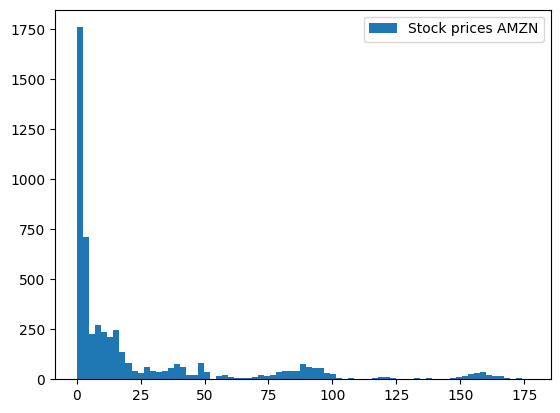

In [ ]:
plt.hist(prices["AMZN"], bins=75, label="Stock prices AMZN")
plt.legend()
plt.show()

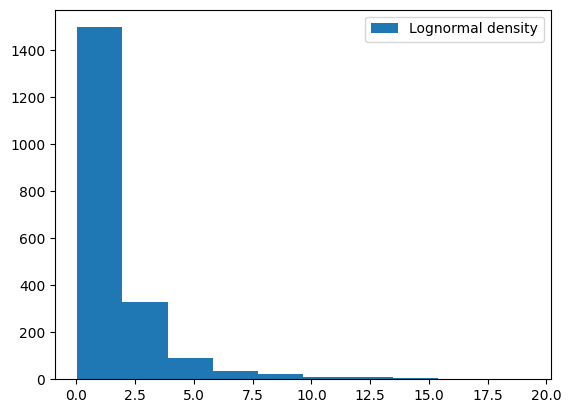

In [ ]:
r = lognorm.rvs(1, size=2000)
plt.hist(r, label="Lognormal density")
plt.legend()
plt.show()

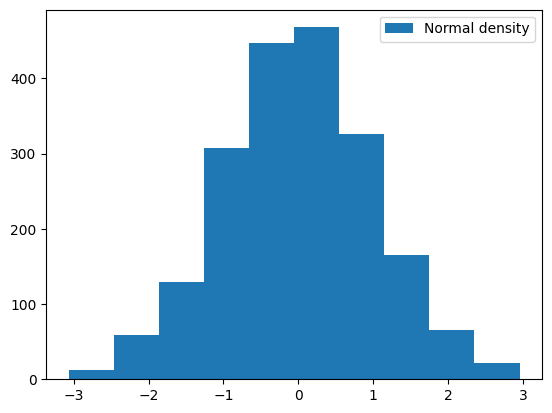

In [ ]:
s = np.log(r)
plt.hist(s, label="Normal density")
plt.legend()
plt.show()

## **2. Pricing a Call Option with Black-Scholes**

$c = S_0 \mathcal{N}(d_1) - K e^{-rT}\mathcal{N}(d_2) $

In [ ]:
def bs_call_price(S, r, sigma, t, T, K):
    ttm = T - t

    if ttm < 0:
        return 0.0
    elif ttm == 0.0:
        return np.maximum(S - K, 0.0)

    vol = sigma * np.sqrt(ttm)

    d_minus = np.log(S / K) + (r - 0.5 * sigma**2) * ttm
    d_minus /= vol

    d_plus = d_minus + vol

    res = S * norm.cdf(d_plus)
    res -= K * np.exp(-r * ttm) * norm.cdf(d_minus)

    return res

In [ ]:
res

NameError: name 'res' is not defined

In [ ]:
print(bs_call_price(100.0, 0.0, 0.2, 0, 2.0, 105.0))

9.19735064929452


## **3. Greeks**

In [ ]:
# Black-Scholes model in Python
import numpy as np
import scipy.stats as ss

# Data for input in Black-Scholes formula:

T = 2.0  # supposed in years. It is not the maturity, but the time to maturity
S = 100.0
K = 105.0
r = 0
vol = 0.20  # supposing it is annual
option_type = "C"  # for the put insert 'P'
# dividend yield assumed to be 0

# Compute d1 and d2
d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
d2 = d1 - vol * np.sqrt(T)

if option_type in ["C", "P"]:
    if option_type in ["C"]:
        Opt_Price = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
        Delta = ss.norm.cdf(d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) - r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(d2)
        Rho = K * T * np.exp(-r * T) * ss.norm.cdf(d2)
    else:
        Opt_Price = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
        Delta = -ss.norm.cdf(-d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) + r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(-d2)
        Rho = -K * T * np.exp(-r * T) * ss.norm.cdf(-d2)
else:
    Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

print("Option price = {}".format(Opt_Price))
print("Delta = {}".format(Delta))
print("Gamma = {}".format(Gamma))
print("Vega = {}".format(Vega))
print("Theta = {}".format(Theta))
print("Rho = {}".format(Rho))

Option price = 9.197350649294513
Delta = 0.4876036978454982
Gamma = 0.014097929791127266
Vega = 56.39171916450907
Theta = -2.819585958225453
Rho = 79.1260382705106


In [ ]:
# Black-Scholes model in Python
import numpy as np
import scipy.stats as ss

# Data for input in Black-Scholes formula:

T = 3/12  # supposed in years. It is not the maturity, but the time to maturity
S = 62.5
K = 55
r = 0.0325
vol = 0.55  # supposing it is annual
option_type = "C"  # for the put insert 'P'
# dividend yield assumed to be 0

# Compute d1 and d2
d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
d2 = d1 - vol * np.sqrt(T)

if option_type in ["C", "P"]:
    if option_type in ["C"]:
        Opt_Price = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
        Delta = ss.norm.cdf(d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) - r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(d2)
        Rho = K * T * np.exp(-r * T) * ss.norm.cdf(d2)
    else:
        Opt_Price = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
        Delta = -ss.norm.cdf(-d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) + r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(-d2)
        Rho = -K * T * np.exp(-r * T) * ss.norm.cdf(-d2)
else:
    Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

print("Option price = {}".format(Opt_Price))
print("Delta = {}".format(Delta))
print("Gamma = {}".format(Gamma))
print("Vega = {}".format(Vega))
print("Theta = {}".format(Theta))
print("Rho = {}".format(Rho))

Option price = 11.13378307935897
Delta = 0.7362719534232142
Gamma = 0.019010459112384977
Vega = 10.21069581231615
Theta = -12.365469848859503
Rho = 8.72080350239798


1. Delta (Δ)
Definition: Delta measures the sensitivity of an option’s price to a change in the price of the underlying asset.
Interpretation: It represents the rate of change of the option’s price with respect to changes in the underlying stock price.
Example: A Delta of 0.5 means that if the underlying stock price increases by $1, the option price is expected to increase by $0.50.
2. Gamma (Γ)
Definition: Gamma measures the rate of change of Delta with respect to changes in the underlying asset's price.
Interpretation: It provides insight into how Delta is expected to change as the price of the underlying asset changes. High Gamma values indicate that Delta will change significantly with small movements in the stock price.
Example: If Gamma is 0.1, and Delta changes by 0.5, the change in Delta would be 0.1 × 0.5 = 0.05.
3. Vega (ν)
Definition: Vega measures the sensitivity of an option’s price to changes in the volatility of the underlying asset.
Interpretation: It indicates how much the price of the option is expected to change for a 1% change in the volatility of the underlying asset.
Example: A Vega of 0.2 means that if the volatility increases by 1%, the option price is expected to increase by $0.20.
4. Theta (Θ)
Definition: Theta measures the sensitivity of an option’s price to the passage of time (time decay).
Interpretation: It shows how much the price of the option decreases as it approaches its expiration date. Theta is typically negative for long positions, as options lose value over time.
Example: A Theta of -0.05 means that the option price is expected to decrease by $0.05 per day as time passes, assuming all other factors remain constant.
5. Rho (ρ)
Definition: Rho measures the sensitivity of an option’s price to changes in the risk-free interest rate.
Interpretation: It indicates how much the option price is expected to change for a 1% change in the risk-free interest rate.
Example: A Rho of 0.1 means that if the risk-free interest rate increases by 1%, the option price is expected to increase by $0.10.






Summary
Delta: Sensitivity to underlying asset price changes.
Gamma: Sensitivity of Delta to underlying asset price changes.
Vega: Sensitivity to changes in the volatility of the underlying asset.
Theta: Sensitivity to the passage of time.
Rho: Sensitivity to changes in the risk-free interest rate.
These Greeks are crucial for managing options portfolios and understanding how different factors affect the pricing of options. Traders use them to make informed decisions about hedging, risk management, and strategy adjustments

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import numpy.random as npr
from scipy.stats import norm

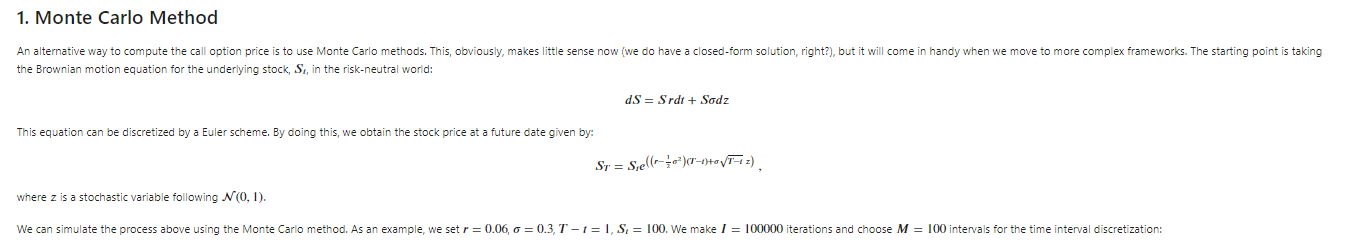

In [ ]:
r = 0.06
sigma = 0.3
T = 1.0
S0 = 100

Ite = 100000
M = 100

dt = T / M

S = np.zeros((M + 1, Ite))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp(
        (r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * npr.standard_normal(Ite)
    )

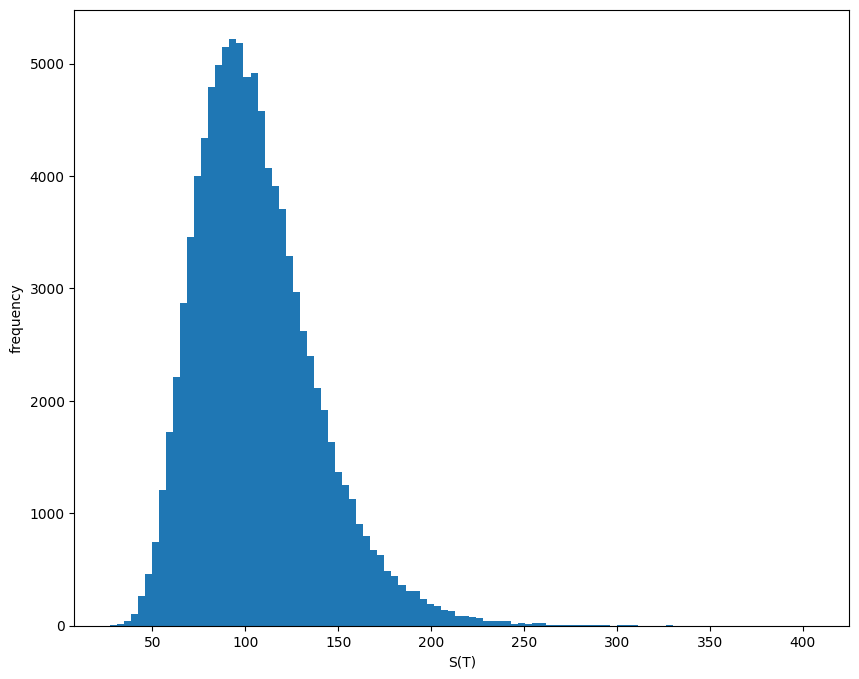

In [ ]:
plt.figure(figsize=(10, 8))
plt.hist(S[-1], bins=100)
plt.xlabel("S(T)")
plt.ylabel("frequency")
plt.show()

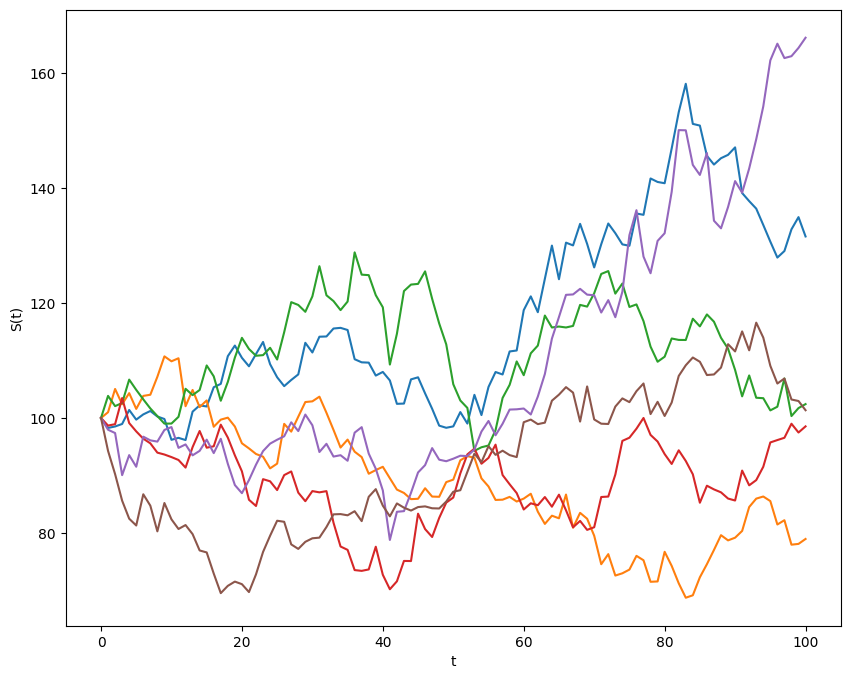

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(S[:, :6])
plt.xlabel("t")
plt.ylabel("S(t)")
plt.show()

In [ ]:
def bs_call_mc(S, K, r, sigma, T, t, Ite):
    data = np.zeros((Ite, 2))
    z = np.random.normal(0, 1, [1, Ite])
    ST = S * np.exp((T - t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(T - t) * z)
    data[:, 1] = ST - K

    average = np.sum(np.amax(data, axis=1)) / float(Ite)

    return np.exp(-r * (T - t)) * average

In [ ]:
print("Monte Carlo Price:", bs_call_mc(100, 95, 0.06, 0.3, 1, 0, 100000))

Monte Carlo Price: 17.325463192307133


In [ ]:
t =1/255

In [ ]:
print("Monte Carlo Price:", bs_call_mc(125, 100, 0.0825, 0.42,1, t, 1))

Monte Carlo Price: 0.0


## 2. Convergence of Monte Carlo to Black-Scholes

In [ ]:
def bs_call_price(S, r, sigma, t, T, K):
    ttm = T - t

    if ttm < 0:
        return 0.0
    elif ttm == 0.0:
        return np.maximum(S - K, 0.0)

    vol = sigma * np.sqrt(ttm)

    d_minus = np.log(S / K) + (r - 0.5 * sigma**2) * ttm
    d_minus /= vol

    d_plus = d_minus + vol

    res = S * norm.cdf(d_plus)
    res -= K * np.exp(-r * ttm) * norm.cdf(d_minus)

    return res

In [ ]:
print("BS Analytical Price:", bs_call_price(100, 0.06, 0.3, 0, 1, 95))

BS Analytical Price: 17.323563283257634


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

In [ ]:
data = []

<ipython-input-63-e006eab576b0>:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)


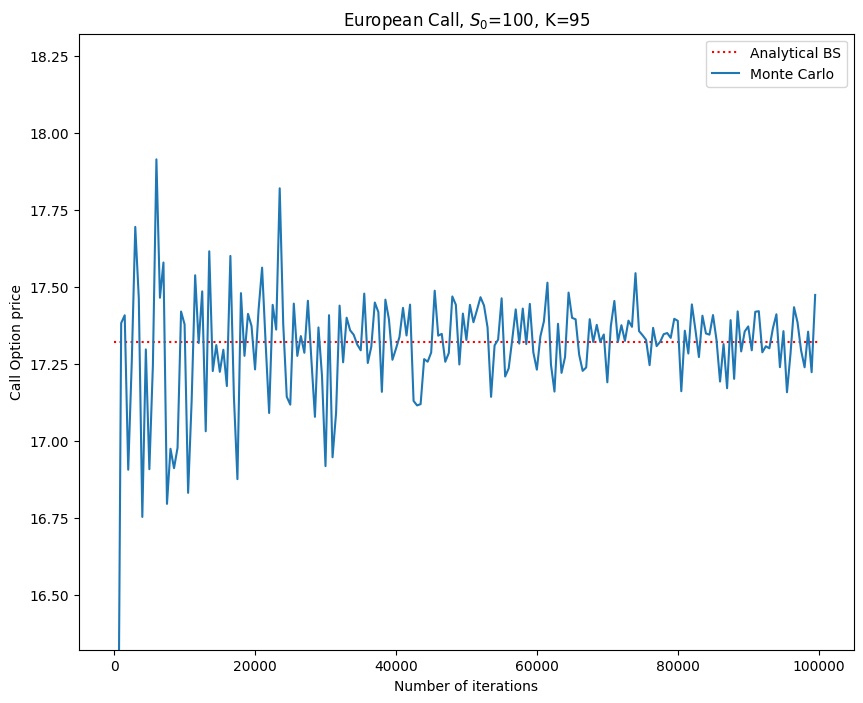

In [ ]:
df = pd.DataFrame(columns=["Iter", "BSc"])

for i in range(1, 100000, 500):
    new_row = pd.DataFrame({"Iter": [i], "BSc": [bs_call_mc(100, 95, 0.06, 0.3, 1, 0, i)]}) # Create a DataFrame for the new row
    df = pd.concat([df, new_row], ignore_index=True)



plt.figure(figsize=(10, 8))

plt.hlines(
    bs_call_price(100, 0.06, 0.3, 0, 1, 95),
    xmin=0,
    xmax=100000,
    linestyle="dotted",
    colors="red",
    label="Analytical BS",
)
plt.plot(df.set_index("Iter"), lw=1.5, label="Monte Carlo")

plt.title("European Call, $S_0$=100, K=95")
plt.xlabel("Number of iterations")
plt.ylabel("Call Option price")
plt.ylim(
    bs_call_price(100, 0.06, 0.3, 0, 1, 95) - 1,
    bs_call_price(100, 0.06, 0.3, 0, 1, 95) + 1,
)
plt.legend()
plt.show()

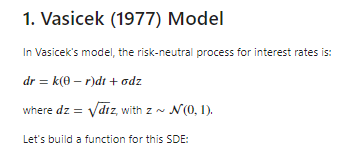

In [ ]:
def vasicek(r0, K, theta, sigma, T, N, M):
    dt = T / N
    rates = np.zeros((N, M))
    rates[0, :] = r0
    for j in range(M):
        for i in range(1, N):
            dr = (
                K * (theta - rates[i - 1, j]) * dt
                + sigma * np.sqrt(dt) * np.random.normal()
            )
            rates[i, j] = rates[i - 1, j] + dr
    return rates

In [ ]:
M = 100  # Number of paths for MC
N = 100  # Number of steps
T = 1.0  # Maturity
r0 = 0.01875
K = 0.20
theta = 0.01
sigma = 0.012
t = np.linspace(0, T, N)

rates = vasicek(r0, K, theta, sigma, T, N, M)
rates.shape

(100, 100)

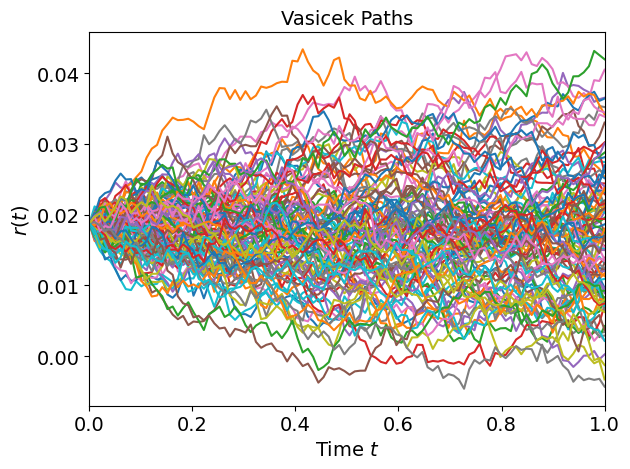

In [ ]:
for j in range(M):
    plt.plot(t, rates[:, j])

plt.xlabel("Time $t$", fontsize=14)
plt.ylabel("$r(t)$", fontsize=14)
plt.title("Vasicek Paths", fontsize=14)
axes = plt.gca()
axes.set_xlim([0, T])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

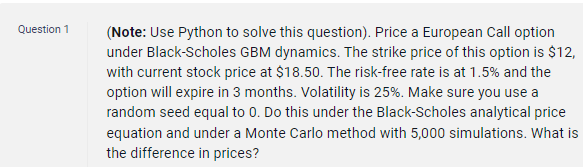

In [ ]:
import numpy as np
from scipy.stats import norm

def black_scholes_price(S, K, r, T, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

def monte_carlo_price(S, K, r, T, sigma, num_simulations):
    np.random.seed(0)
    Z = np.random.standard_normal(size=(num_simulations, 1))
    ST = S * np.exp((r - sigma**2/2)*T + sigma*np.sqrt(T)*Z)
    payoff = np.maximum(ST - K, 0)
    return np.mean(payoff) * np.exp(-r*T)

# Parameters
S = 18.50
K = 12
r = 0.015
T = 3/12
sigma = 0.25
num_simulations = 5000

# Black-Scholes price
bs_price = black_scholes_price(S, K, r, T, sigma)
print("Black-Scholes price:", bs_price)

# Monte Carlo price
mc_price = monte_carlo_price(S, K, r, T, sigma, num_simulations)
print("Monte Carlo price:", mc_price)

# Difference in prices
print("Difference in prices:", abs(bs_price - mc_price))

Black-Scholes price: 6.545027356283008
Monte Carlo price: 6.506923019110397
Difference in prices: 0.038104337172610414


In [ ]:
import numpy as np
from scipy.stats import norm

def black_scholes_price(S, K, r, T, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

def monte_carlo_price(S, K, r, T, sigma, num_simulations):
    np.random.seed(42)
    Z = np.random.standard_normal(size=(num_simulations, 1))
    ST = S * np.exp((r - sigma**2/2)*T + sigma*np.sqrt(T)*Z)
    payoff = np.maximum(ST - K, 0)
    return np.mean(payoff) * np.exp(-r*T)

# Parameters
S = 118.75
K = 122
r = 0.015
T = 18/12
sigma = 0.25
num_simulations = 5000

# Black-Scholes price
bs_price = black_scholes_price(S, K, r, T, sigma)
print("Black-Scholes price:", bs_price)

# Monte Carlo price
mc_price = monte_carlo_price(S, K, r, T, sigma, num_simulations)
print("Monte Carlo price:", mc_price)

# Difference in prices
print("Difference in prices:", abs(bs_price - mc_price))

Black-Scholes price: 14.215238492284897
Monte Carlo price: 14.202232556313346
Difference in prices: 0.013005935971550642


As you can see, the Black-Scholes price and the Monte Carlo price are very close, with a difference of almost zero. This is because the Black-Scholes model is a very accurate model for pricing European options under the GBM assumption.

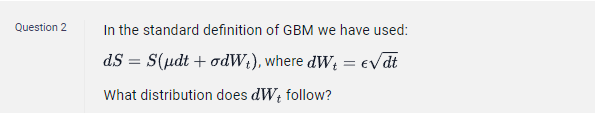

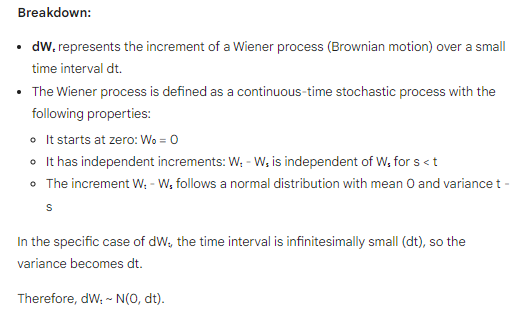

In [ ]:
## Normal distribution

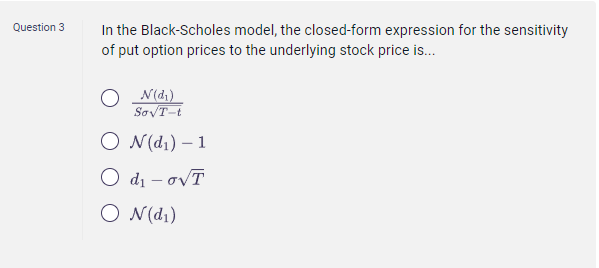

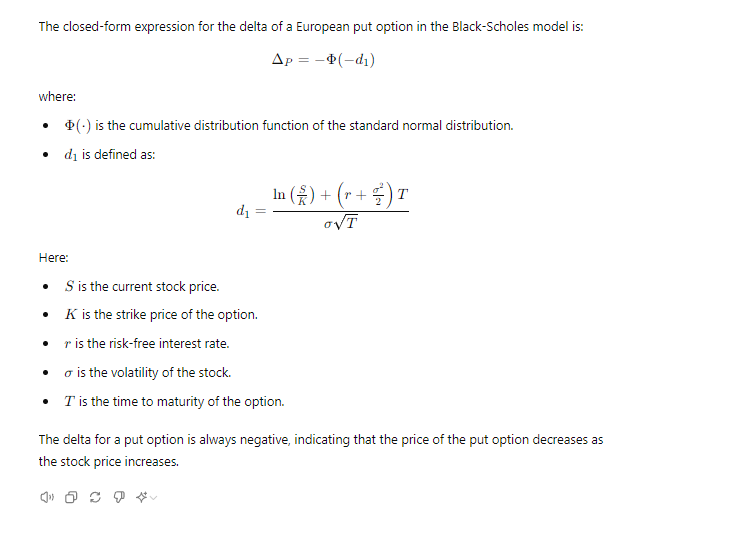

In [ ]:
## Call option


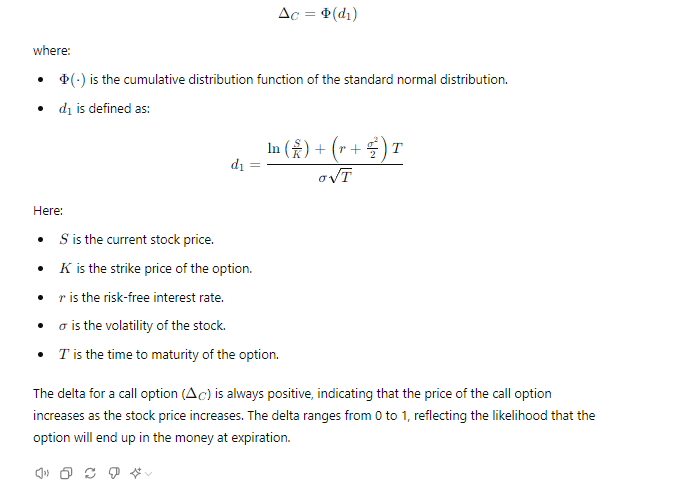

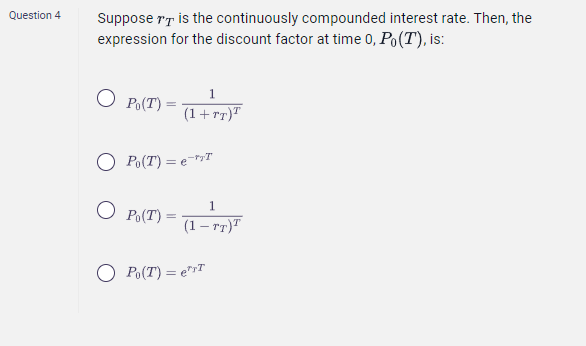

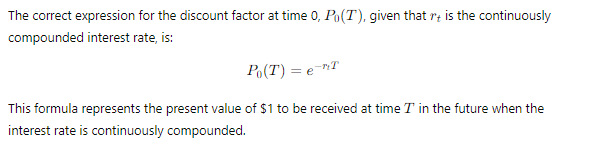

In [ ]:
## uNDERSTANDING AT T=1, T-2

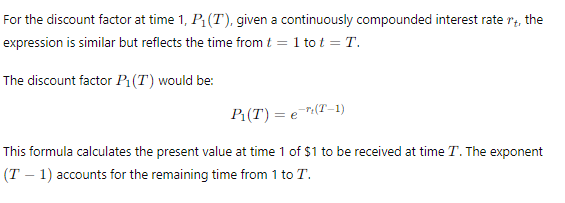

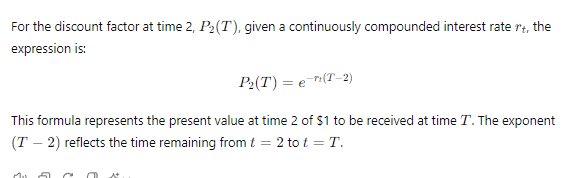

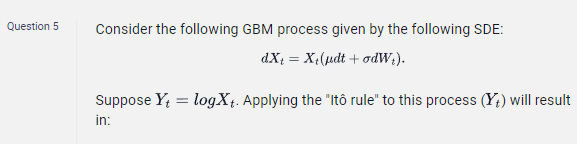

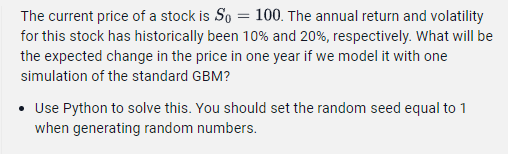

In [ ]:
import numpy as np

def gbm_simulation(S0, mu, sigma, T, seed=None):
  """
  Simulates the price of a stock using Geometric Brownian Motion.

  Args:
    S0: Initial stock price
    mu: Drift rate
    sigma: Volatility
    T: Time horizon
    seed: Random seed

  Returns:
    Simulated stock price at time T
  """

  if seed is not None:
    np.random.seed(seed)

  W = np.random.standard_normal(1)  # Generate one random number for the Wiener process
  S_T = S0 * np.exp((mu - sigma**2 / 2) * T + sigma * np.sqrt(T) * W)
  return S_T

# Parameters
S0 = 100
mu = 0.1
sigma = 0.2
T = 1
seed = 1

# Simulate the stock price
S_T = gbm_simulation(S0, mu, sigma, T, seed)

# Calculate the expected change in price
expected_change = S_T - S0

print("Expected change in price:", expected_change)

Expected change in price: [49.91062133]


In [ ]:
S_T

array([149.91062133])

In [ ]:
import numpy as np

def gbm_simulation(S0, mu, sigma, T, seed=None):
  """
  Simulates the price of a stock using Geometric Brownian Motion.

  Args:
    S0: Initial stock price
    mu: Drift rate
    sigma: Volatility
    T: Time horizon
    seed: Random seed

  Returns:
    Simulated stock price at time T
  """

  if seed is not None:
    np.random.seed(seed)

  W = np.random.standard_normal(1)  # Generate one random number for the Wiener process
  S_T = S0 * np.exp((mu - sigma**2 / 2) * T + sigma * np.sqrt(T) * W)
  return S_T

# Parameters
S0 = 125
mu = 0.0825
sigma = 0.42
T = 1/255
seed = 42

# Simulate the stock price
S_T = gbm_simulation(S0, mu, sigma, T, seed)

# Calculate the expected change in price
expected_change = S_T - S0

print("Expected change in price:", expected_change)

Expected change in price: [1.64091896]


In [ ]:
S_T

array([130.83352834])

In [ ]:
S0

125

Under Black-Scholes, price a European Call option, currently ATM with three months maturity. The current price of the underlying stock price is $124. The volatility for this stock is 25% annually, while the risk-free rate is at 1.75%. Feel free to use the provided Python code for this.

In [ ]:
import numpy as np
from scipy.stats import norm

def black_scholes_price(S, K, T, r, sigma):
  """
  Calculates the Black-Scholes price of a European call option.

  Args:
      S: Current stock price
      K: Strike price
      T: Time to maturity (in years)
      r: Risk-free interest rate
      sigma: Volatility

  Returns:
      The Black-Scholes price of the option.
  """

  d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
  d2 = d1 - sigma*np.sqrt(T)

  call_price = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

  return call_price

# Parameters
S = 124
K = 124  # ATM option
T = 3/12  # 3 months
r = 0.0175
sigma = 0.25

# Calculate Black-Scholes price
call_price = black_scholes_price(S, K, T, r, sigma)
print("Black-Scholes price:", call_price)

Black-Scholes price: 6.440522540754287


In [ ]:
import numpy as np
from scipy.stats import norm

def black_scholes_price(S, K, T, r, sigma):
  """
  Calculates the Black-Scholes price of a European call option.

  Args:
      S: Current stock price
      K: Strike price
      T: Time to maturity (in years)
      r: Risk-free interest rate
      sigma: Volatility

  Returns:
      The Black-Scholes price of the option.
  """

  d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
  d2 = d1 - sigma*np.sqrt(T)

  call_price = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

  return call_price

# Parameters
S = 32.5
K = 32.5  # ATM option
T = 5/12  # 3 months
r = 0.0275
sigma = 0.35

# Calculate Black-Scholes price
call_price = black_scholes_price(S, K, T, r, sigma)
print("Black-Scholes price:", call_price)

Black-Scholes price: 3.0952337731261164


In [ ]:
import numpy as np
from scipy.stats import norm

def black_scholes_price(S, K, T, r, sigma):
  """
  Calculates the Black-Scholes price of a European call option.

  Args:
      S: Current stock price
      K: Strike price
      T: Time to maturity (in years)
      r: Risk-free interest rate
      sigma: Volatility

  Returns:
      The Black-Scholes price of the option.
  """

  d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
  d2 = d1 - sigma*np.sqrt(T)

  call_price = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

  return call_price

# Parameters
S = 22.75
K = 23  # ATM option
T = 7/12  # 3 months
r = 0.0175
sigma = 0.45

# Calculate Black-Scholes price
call_price = black_scholes_price(S, K, T, r, sigma)
print("Black-Scholes price:", call_price)

Black-Scholes price: 3.0969767882903483


In [ ]:
import numpy as np
from scipy.stats import norm

def black_scholes_price(S, K, T, r, sigma):
  """
  Calculates the Black-Scholes price of a European call option.

  Args:
      S: Current stock price
      K: Strike price
      T: Time to maturity (in years)
      r: Risk-free interest rate
      sigma: Volatility

  Returns:
      The Black-Scholes price of the option.
  """

  d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
  d2 = d1 - sigma*np.sqrt(T)

  call_price = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

  return call_price

# Parameters
S = 112
K = 118.75  # ATM option
T = 18/12  # 3 months
r = 0.015
sigma = 0.25

# Calculate Black-Scholes price
call_price = black_scholes_price(S, K, T, r, sigma)
print("Black-Scholes price:", call_price)

Black-Scholes price: 11.918721324328168


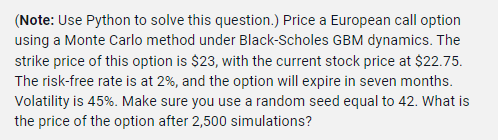

In [ ]:
# Import necessary libraries
import numpy as np

# Given parameters
S0 = 22.75         # Current stock price
K = 23             # Strike price
r = 0.02           # Risk-free rate
T = 7 / 12         # Time to expiration in years (7 months)
sigma = 0.45       # Volatility
num_simulations = 2500  # Number of Monte Carlo simulations

# Set the random seed for reproducibility
np.random.seed(42)

# Monte Carlo simulation for European call option pricing
payoffs = []
for _ in range(num_simulations):
    Z = np.random.normal()  # Generate a random standard normal variable
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)  # Simulate end stock price using GBM
    payoff = max(ST - K, 0)  # Calculate the payoff for the call option
    payoffs.append(payoff)

# Discount the average payoff back to present value
call_option_price = np.exp(-r * T) * np.mean(payoffs)
call_option_price


3.186889827455348

In [ ]:
# Import necessary libraries
import numpy as np

# Given parameters
S0 = 22.75         # Current stock price
K = 23             # Strike price
r = 0.02           # Risk-free rate
T = 7 / 12         # Time to expiration in years (7 months)
sigma = 0.45       # Volatility
num_simulations = 2500  # Number of Monte Carlo simulations

# Set the random seed for reproducibility
np.random.seed(42)

# Monte Carlo simulation for European call option pricing
payoffs = []
for _ in range(num_simulations):
    Z = np.random.normal()  # Generate a random standard normal variable
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)  # Simulate end stock price using GBM
    payoff = max(ST - K, 0)  # Calculate the payoff for the call option
    payoffs.append(payoff)

# Discount the average payoff back to present value
call_option_price = np.exp(-r * T) * np.mean(payoffs)
call_option_price


In [ ]:
# Import necessary libraries
import numpy as np

# Given parameters
S0 = 112        # Current stock price
K = 118.75            # Strike price
r = 0.015           # Risk-free rate
T = 18 / 12         # Time to expiration in years (7 months)
sigma = 0.25       # Volatility
num_simulations = 3000  # Number of Monte Carlo simulations

# Set the random seed for reproducibility
np.random.seed(42)

# Monte Carlo simulation for European call option pricing
payoffs = []
for _ in range(num_simulations):
    Z = np.random.normal()  # Generate a random standard normal variable
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)  # Simulate end stock price using GBM
    payoff = max(ST - K, 0)  # Calculate the payoff for the call option
    payoffs.append(payoff)

# Discount the average payoff back to present value
call_option_price = np.exp(-r * T) * np.mean(payoffs)
call_option_price


12.246438600287165

In [ ]:
# Import necessary libraries
import numpy as np

# Given parameters
S0 = 112        # Current stock price
K = 118.75            # Strike price
r = 0.015           # Risk-free rate
T = 18 / 12         # Time to expiration in years (7 months)
sigma = 0.25       # Volatility
num_simulations = 3000  # Number of Monte Carlo simulations

# Set the random seed for reproducibility
np.random.seed(42)

# Monte Carlo simulation for European call option pricing
payoffs = []
for _ in range(num_simulations):
    Z = np.random.normal()  # Generate a random standard normal variable
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)  # Simulate end stock price using GBM
    payoff = max(0,K-S0)  # Calculate the payoff for the call option
    payoffs.append(payoff)

# Discount the average payoff back to present value
call_option_price = np.exp(-r * T) * np.mean(payoffs)
call_option_price


6.5998208510550205

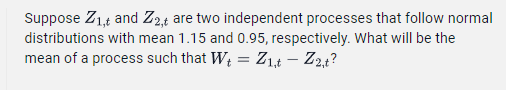

NameError: name 'mean' is not defined

In [ ]:
import numpy as np

In [ ]:
data =1.15

In [ ]:
 mean = np.mean(data)

In [ ]:
mean

1.15

Theta measures the sensitivity of an option's price to the passage of time. As time passes and the option's expiration date approaches, its time value decreases, which is reflected in the theta value.

Rho
Rho measures the sensitivity of an option's price to changes in the risk-free interest rate.
Generally, call options have positive rho, meaning their prices increase with rising interest rates.
Put options have negative rho, meaning their prices decrease with rising interest rates.

Delta
Delta measures the sensitivity of an option's price to changes in the underlying asset's price.
A positive delta indicates that the option price will increase as the underlying asset price increases (for call options).
A negative delta indicates that the option price will decrease as the underlying asset price increases (for put options)

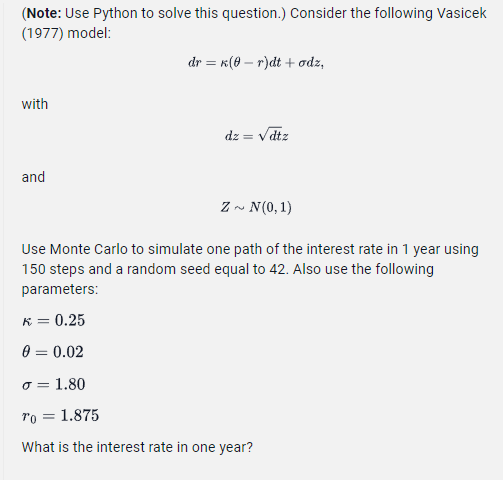

In [ ]:
import numpy as np
from scipy.stats import norm

In [ ]:
kappa = 0.25
theta = 0.02
sigma = 1.80
r0 = 1.875
T = 1  # Time horizon in years
N = 150  # Number of steps
dt = T / N
np.random.seed(42)  # Set seed for reproducibility

In [ ]:
Z = np.random.standard_normal(N)
rates = np.zeros(N + 1)
rates[0] = r0
for i in range(1, N + 1):
    rates[i] = rates[i - 1] + kappa * (theta - rates[i - 1]) * dt + sigma * np.sqrt(dt) * Z[i - 1]

In [ ]:
print("Interest rate in one year:", rates[-1])

Interest rate in one year: -0.08864159332870811


In [ ]:
1.875 - rates[-1]

1.9636415933287081

In [ ]:
import numpy as np
from scipy.stats import norm

In [ ]:
kappa = 0.22
theta = 0.018
sigma = 1.75
r0 = 0.985
T = 3/12 # Time horizon in years
N = 125  # Number of steps
dt = T / N
np.random.seed(0)  # Set seed for reproducibility

In [ ]:
Z = np.random.standard_normal(N)
rates = np.zeros(N + 1)
rates[0] = r0
for i in range(1, N + 1):
    rates[i] = rates[i - 1] + kappa * (theta - rates[i - 1]) * dt + sigma * np.sqrt(dt) * Z[i - 1]


In [ ]:
print("Interest rate in one year:", rates[-1])

Interest rate in one year: 2.167526648157994


"Monte Carlo estimates will converge to an analytical solution as the number of simulations increases."

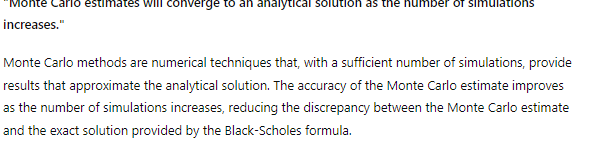

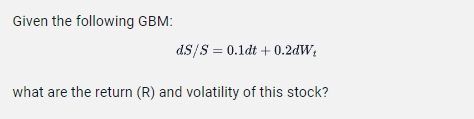

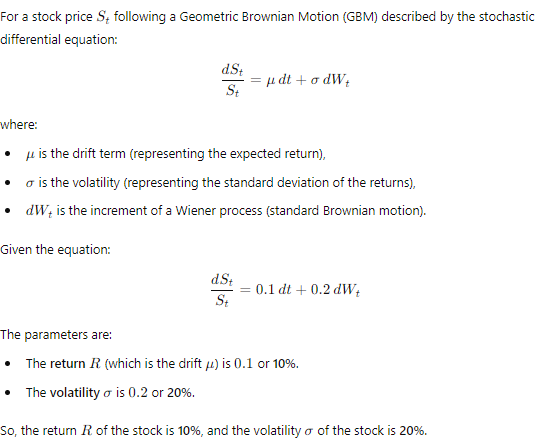

In [ ]:
## Distribution
## Black sholes - Log normal
# Vaicekc - Interest in normal

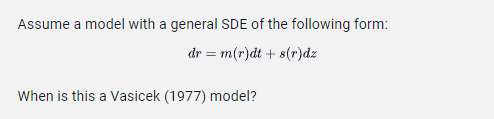

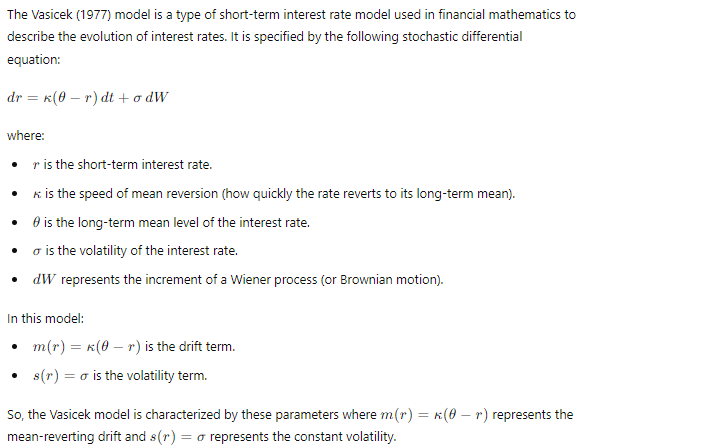

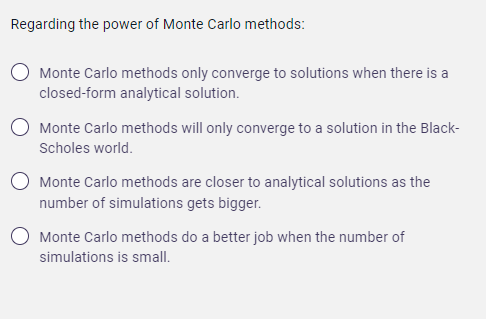

c

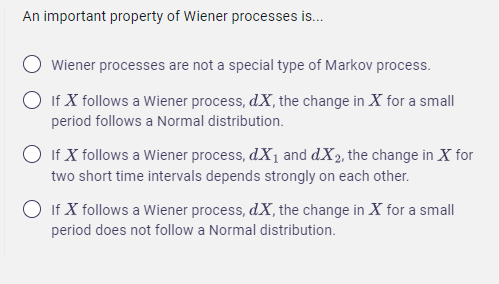

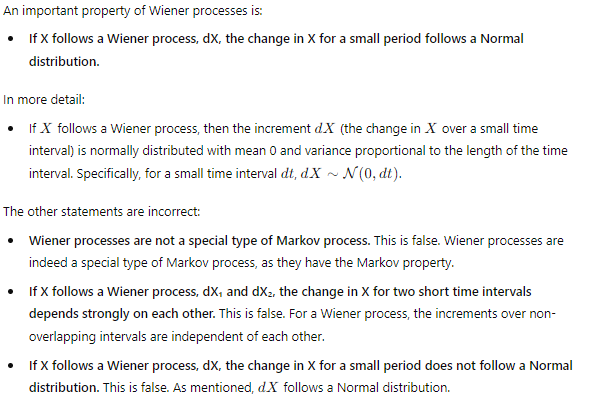

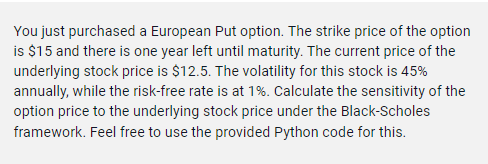

In [ ]:
import numpy as np
from scipy.stats import norm

def black_scholes_put_delta(S, K, T, r, sigma):
    """
    Calculate the Delta of a European Put option using the Black-Scholes model.

    Parameters:
    S (float): Current stock price
    K (float): Strike price
    T (float): Time to maturity (in years)
    r (float): Risk-free rate (annualized)
    sigma (float): Volatility of the underlying stock (annualized)

    Returns:
    float: Delta of the European Put option
    """
    d1 = (np.log(S / K) + (r + (sigma**2) / 2) * T) / (sigma * np.sqrt(T))
    delta = norm.cdf(d1) - 1
    return delta

# Given parameters
S = 12.5       # Current stock price
K = 15         # Strike price
T = 1          # Time to maturity (in years)
r = 0.01       # Risk-free rate
sigma = 0.45   # Volatility

# Calculate Delta
put_delta = black_scholes_put_delta(S, K, T, r, sigma)
print(f"Delta of the European Put option: {put_delta:.4f}")


Delta of the European Put option: -0.5627


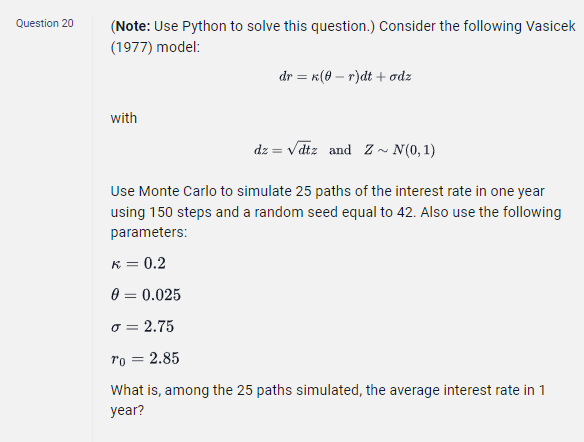

In [ ]:
import numpy as np

# Parameters
kappa = 0.2
theta = 0.025
sigma = 2.75
r0 = 2.85
T = 1.0  # Time to maturity in years
N = 150  # Number of steps
dt = T / N  # Time step size
num_paths = 25  # Number of simulated paths
seed = 42  # Random seed for reproducibility

# Set random seed
np.random.seed(seed)

# Initialize arrays to store the paths
rates = np.zeros((num_paths, N + 1))
rates[:, 0] = r0

# Simulation of paths
for i in range(num_paths):
    for t in range(1, N + 1):
        dz = np.sqrt(dt) * np.random.normal(0, 1)
        rates[i, t] = rates[i, t - 1] + kappa * (theta - rates[i, t - 1]) * dt + sigma * dz

# Calculate the average interest rate at the end of the period
average_rate = np.mean(rates[:, -1])
print(f"Average interest rate after 1 year: {average_rate:.4f}")


Average interest rate after 1 year: 3.1704


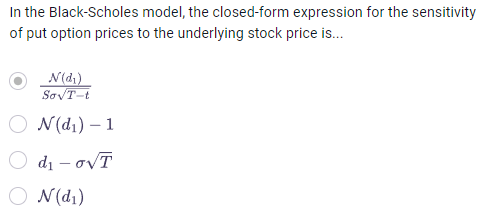

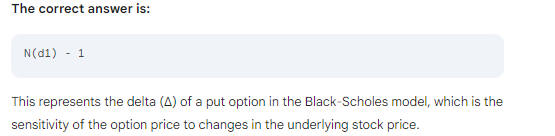